# Capstone 3.3 Modeling

## 1. Import, Review, EDA

In [10]:
#import packages

import pandas as pd
from pandas_datareader.data import DataReader
from pandas.tseries.offsets import MonthEnd
from datetime import date
import requests
import collections
import pandas as pd 
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


In [11]:
#drop NA values
os.chdir(r'C:\Users\nmur1\Google Drive\Springboard\Capstone3\CleanData')
dfMacro = pd.read_csv('MacroIndicators.csv')

In [12]:
#import home values from data wrangling 1

HomeValues = pd.read_pickle('HomeVals_Clustered')

In [13]:
dfMacro = dfMacro.drop(columns = 'Unnamed: 0')
dfMacro.DATE = pd.to_datetime(dfMacro.DATE)

In [14]:
#filter to cluster 2, summarize by cluster 2 average values, merge with Macro Eco Data
avg_c2 = HomeValues[HomeValues.labels == 3].groupby('Date')['Price'].mean().reset_index()
avg_c2.columns = ['DATE', 'Price']
avg_c2.DATE = pd.to_datetime(avg_c2.DATE)
df = avg_c2.merge(dfMacro, on = 'DATE', how = 'left').drop_duplicates()
df.to_csv('EDA_Tableau.csv')

In [15]:
avg_c2.dtypes

DATE     datetime64[ns]
Price           float64
dtype: object

In [16]:
df

,DATE,Price,MORTGAGE30US,GDP,GDP Growh,UNRATE,UMCSENT,HOUST,SP_Value,SP500 Growth,PE_Ratio
0,1996-01-31,88835.635223,7.0300,10817.896,0.007489,5.6,89.3,1467.0,649.54,0.057160,19.10
1,1996-02-29,88917.151387,7.0750,10817.896,0.007489,5.5,88.5,1491.0,647.07,-0.003803,19.01
2,1996-03-31,89018.471648,7.6240,10817.896,0.007489,5.5,93.7,1424.0,647.17,0.000155,18.85
3,1996-04-30,89225.683095,7.9250,10998.322,0.016678,5.6,92.7,1516.0,661.23,0.021725,19.10
4,1996-05-31,89436.210210,8.0700,10998.322,0.016678,5.6,89.4,1504.0,668.50,0.010995,19.15
...,...,...,...,...,...,...,...,...,...,...,...
292,2020-05-31,177020.338809,3.2325,17302.511,-0.089861,13.3,72.3,1038.0,3104.66,0.063382,31.29
293,2020-06-30,177727.557145,3.1625,17302.511,-0.089861,11.1,78.1,1265.0,3207.62,0.034619,32.37
294,2020-07-31,178543.989048,3.0160,18583.501,0.074035,10.2,72.5,1487.0,3391.71,0.036865,34.28
295,2020-08-31,179511.230878,2.9350,18583.501,0.074035,8.4,74.1,1373.0,3365.52,-0.038508,34.06


### Examine Correlation of Variables

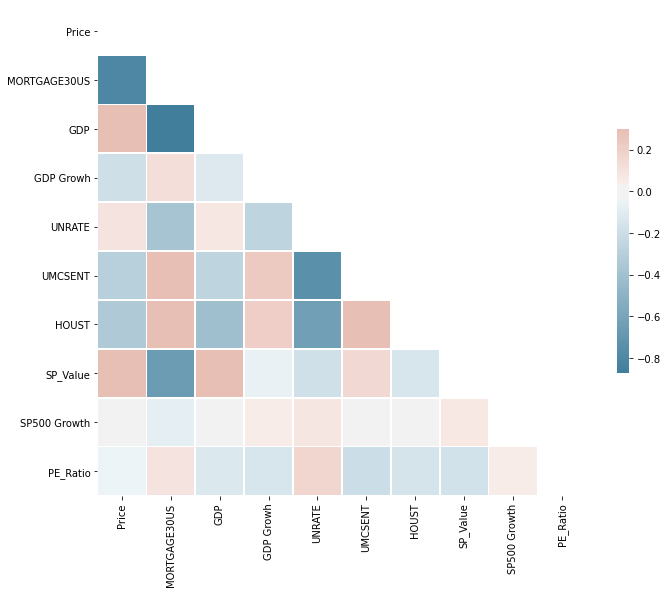

,Price,MORTGAGE30US,GDP,GDP Growh,UNRATE,UMCSENT,HOUST,SP_Value,SP500 Growth,PE_Ratio
Price,1.000000,-0.797968,0.960763,-0.188653,0.097935,-0.294880,-0.334010,0.826778,-0.020803,-0.039382
MORTGAGE30US,-0.797968,1.000000,-0.874733,0.128580,-0.382193,0.406098,0.538787,-0.658662,-0.078845,0.098878
GDP,0.960763,-0.874733,1.000000,-0.115745,0.079058,-0.261315,-0.411287,0.838977,-0.013482,-0.126628
GDP Growh,-0.188653,0.128580,-0.115745,1.000000,-0.261763,0.232988,0.211518,-0.055526,0.050511,-0.145183
UNRATE,0.097935,-0.382193,0.079058,-0.261763,1.000000,-0.740616,-0.628681,-0.184986,0.080958,0.169253
UMCSENT,-0.294880,0.406098,-0.261315,0.232988,-0.740616,1.000000,0.630442,0.155795,0.032929,-0.203497
HOUST,-0.334010,0.538787,-0.411287,0.211518,-0.628681,0.630442,1.000000,-0.149676,-0.009902,-0.151334
SP_Value,0.826778,-0.658662,0.838977,-0.055526,-0.184986,0.155795,-0.149676,1.000000,0.070116,-0.170701
SP500 Growth,-0.020803,-0.078845,-0.013482,0.050511,0.080958,0.032929,-0.009902,0.070116,1.000000,0.050807
PE_Ratio,-0.039382,0.098878,-0.126628,-0.145183,0.169253,-0.203497,-0.151334,-0.170701,0.050807,1.000000


In [17]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
s = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


plt.show()
corr

### Plot With Price with Various X Variables

In [18]:
def dual_axis(x, y1,y2, y1_title, y2_title):

    fig, ax1 = plt.subplots()
    t = x
    data1 = y1
    data2 = y2

    color = 'tab:red'
    ax1.set_xlabel('Month')
    ax1.set_ylabel(y1_title, color=color)
    ax1.plot(t, data1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(y2_title, color=color)  # we already handled the x-label with ax1
    ax2.plot(t, data2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    plt.show()

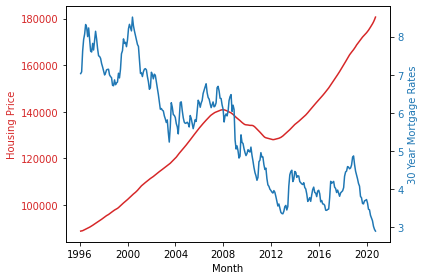

In [19]:
dual_axis(df.DATE, df.Price, df.MORTGAGE30US, "Housing Price", "30 Year Mortgage Rates")

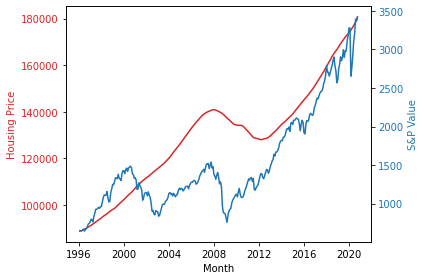

In [20]:
dual_axis(df.DATE, df.Price, df.SP_Value, "Housing Price", "S&P Value")

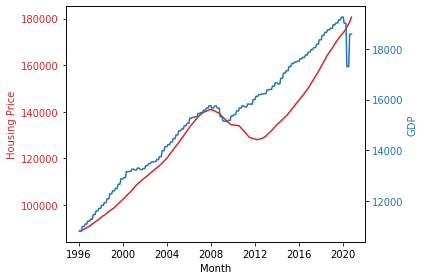

In [21]:
dual_axis(df.DATE, df.Price, df.GDP, "Housing Price", "GDP")

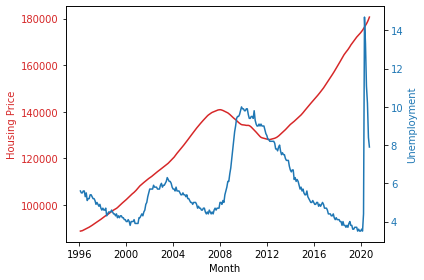

In [22]:
dual_axis(df.DATE, df.Price, df.UNRATE, "Housing Price", "Unemployment")

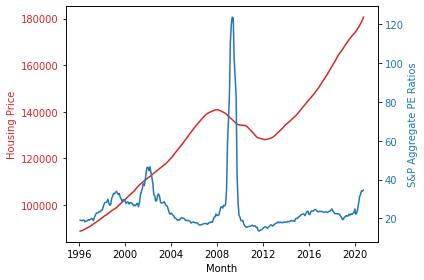

In [23]:
dual_axis(df.DATE, df.Price, df.PE_Ratio, "Housing Price", "S&P Aggregate PE Ratios")

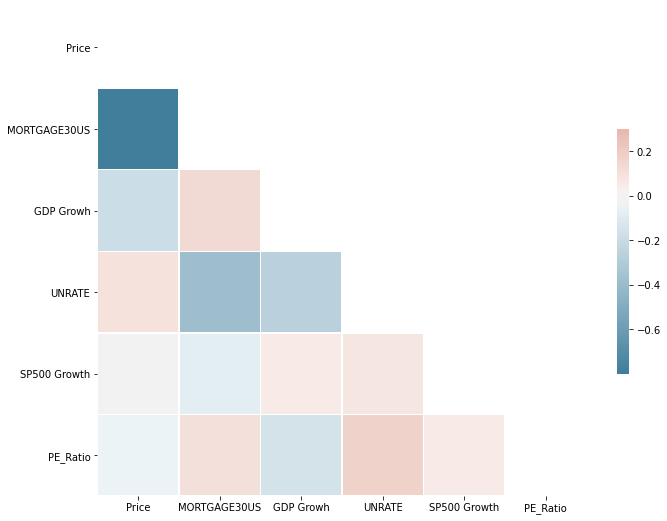

,Price,MORTGAGE30US,GDP Growh,UNRATE,SP500 Growth,PE_Ratio
Price,1.000000,-0.797968,-0.188653,0.097935,-0.020803,-0.039382
MORTGAGE30US,-0.797968,1.000000,0.128580,-0.382193,-0.078845,0.098878
GDP Growh,-0.188653,0.128580,1.000000,-0.261763,0.050511,-0.145183
UNRATE,0.097935,-0.382193,-0.261763,1.000000,0.080958,0.169253
SP500 Growth,-0.020803,-0.078845,0.050511,0.080958,1.000000,0.050807
PE_Ratio,-0.039382,0.098878,-0.145183,0.169253,0.050807,1.000000


In [34]:
# Drop Growh rate variables and Date for modeling
df1 = df.drop(columns = ['SP_Value', 'GDP', 'DATE', 'HOUST', 'UMCSENT'])
corr = df1.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
s = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


plt.show()
corr



## 2. Time Series Prep. Feature Selection, Differencing, and Max Lags

#### Run Graingers Causality Test for Time Series variables

In [35]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

causality = grangers_causation_matrix(df1, variables = df1.columns) 

- P Values of Less than .05 are significant. One can assume the one variable causes the other
- Examping the price as the y variable all variables are significant

,Price_x,MORTGAGE30US_x,GDP Growh_x,UNRATE_x,SP500 Growth_x,PE_Ratio_x
Price_y,False,True,True,True,True,True


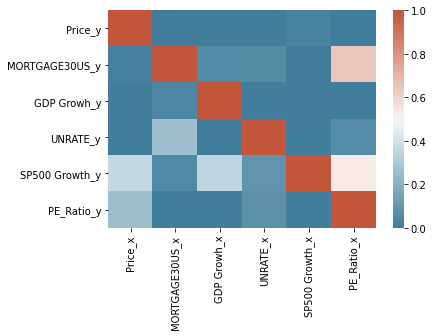

In [36]:
def gcause(df, threshold):
    if df.value < threshold:
        cause = "Yes"
    else:
        cause = "No"
    return cause


cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(causality, cmap = cmap)
causality.apply(lambda x: x < .05, axis = 1).iloc[:1]

In [37]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df1)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Price  ::  209.93    > 83.9383   =>   True
MORTGAGE30US ::  114.74    > 60.0627   =>   True
GDP Growh ::  55.93     > 40.1749   =>   True
UNRATE ::  28.45     > 24.2761   =>   True
SP500 Growth ::  7.3       > 12.3212   =>   False
PE_Ratio ::  1.04      > 4.1296    =>   False


### Check for Stationarity

In [39]:
# Augmented Dickey-Fuller Test (ADF Test)/unit root test
from statsmodels.tsa.stattools import adfuller
def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)
    
    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")
#apply adf test on the series
adf_test(df1["Price"])


Test Statistic            0.777946
p-value                   0.991272
# Lags                   16.000000
# Observations          280.000000
Critical Value (1%)      -3.453922
Critical Value (5%)      -2.871918
Critical Value (10%)     -2.572300
dtype: float64
 Series is Non-Stationary


### Need two levels of differencing to make stationary

In [40]:
df_differenced = df1.diff().diff().dropna()

In [41]:
adf_test(df_differenced["Price"])

Test Statistic           -2.797250
p-value                   0.058668
# Lags                   16.000000
# Observations          278.000000
Critical Value (1%)      -3.454094
Critical Value (5%)      -2.871993
Critical Value (10%)     -2.572340
dtype: float64
 Series is Non-Stationary


### Find the best lag for VAR

In [42]:
from statsmodels.tsa.api import VAR
model = VAR(df_differenced)
x = model.select_order(maxlags=12)
x.summary()


,AIC,BIC,FPE,HQIC
0,-6.550,-6.472,0.001430,-6.519
1,-7.746,-7.205,0.0004326,-7.529
2,-9.597,-8.592,6.795e-05,-9.194
3,-10.87,-9.404*,1.900e-05,-10.28
4,-11.33,-9.402,1.199e-05,-10.56
5,-11.59,-9.193,9.317e-06,-10.63
6,-11.85,-8.987,7.224e-06,-10.70
7,-12.23,-8.907,4.951e-06,-10.90*
8,-12.35,-8.561,4.429e-06,-10.83
9,-12.47,-8.218,3.960e-06,-10.76


In [43]:
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -7.858052250965069
BIC :  -7.331826569916686
FPE :  0.00038664707081464863
HQIC:  -7.647314743838378 

Lag Order = 2
AIC :  -9.695054513262198
BIC :  -8.71534985966721
FPE :  6.160886849242103e-05
HQIC:  -9.302668394134164 

Lag Order = 3
AIC :  -10.91761127682955
BIC :  -9.482166299231658
FPE :  1.8156054117632315e-05
HQIC:  -10.342629979935207 

Lag Order = 4
AIC :  -11.378407978904841
BIC :  -9.48494237727005
FPE :  1.1469027863473655e-05
HQIC:  -10.619876989027059 

Lag Order = 5
AIC :  -11.634623499389015
BIC :  -9.28083780396013
FPE :  8.897824480536113e-06
HQIC:  -10.691580260573224 

Lag Order = 6
AIC :  -11.860248639873811
BIC :  -9.043823986721701
FPE :  7.125924707849446e-06
HQIC:  -10.731722462819768 

Lag Order = 7
AIC :  -12.237740386638151
BIC :  -8.9563382898497
FPE :  4.909953609788132e-06
HQIC:  -10.92275235474574 

Lag Order = 8
AIC :  -12.38473406680045
BIC :  -8.635996187241812
FPE :  4.267545856338451e-06
HQIC:  -10.882296940845992 

Lag Order

In [44]:
results = model.fit(maxlags=9, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 17, Dec, 2020
Time:                     17:58:18
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -8.26216
Nobs:                     286.000    HQIC:                  -10.7897
Log likelihood:          -320.170    FPE:                3.91177e-06
AIC:                     -12.4806    Det(Omega_mle):     1.36158e-06
--------------------------------------------------------------------
Results for equation Price
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.688307         1.872511            0.368           0.713
L1.Price                0.536863         0.066328            8.094           0.000
L1.MORTGAGE30US        15.826850        12.437844   

In [69]:
drop =  ['DATE', 'GDP', 'UMCSENT','HOUST','SP_Value','SP500 Growth', 'PE_Ratio']

## 3. Initial Model Testing

In [46]:
df.columns

Index(['DATE', 'Price', 'MORTGAGE30US', 'GDP', 'GDP Growh', 'UNRATE',
       'UMCSENT', 'HOUST', 'SP_Value', 'SP500 Growth', 'PE_Ratio'],
      dtype='object')

In [71]:
df2 = df.drop(columns = drop)
df2

,Price,MORTGAGE30US,GDP Growh,UNRATE
0,88835.635223,7.0300,0.007489,5.6
1,88917.151387,7.0750,0.007489,5.5
2,89018.471648,7.6240,0.007489,5.5
3,89225.683095,7.9250,0.016678,5.6
4,89436.210210,8.0700,0.016678,5.6
...,...,...,...,...
292,177020.338809,3.2325,-0.089861,13.3
293,177727.557145,3.1625,-0.089861,11.1
294,178543.989048,3.0160,0.074035,10.2
295,179511.230878,2.9350,0.074035,8.4


In [72]:
def var_forecast(df, nobs, diff = 2):
    
    
    
    df_train, df_test = df[0:-nobs], df[-nobs:]
    
    if diff == 1:
        df_differenced = df_train.diff().dropna()
    else:
        df_differenced = df_train.diff().diff().dropna()
    
    
    model = VAR(df_differenced)
    results = model.fit(maxlags=10, ic='aic')
    
    pred = results.forecast(results.y, steps=nobs)
    df_forecast = pd.DataFrame(pred, index=df.index[-nobs:], columns=df.columns + '_1d')
    df_results = invert_transformation(df_train, df_forecast, second_diff=True)   
    return df_results, df_test


In [73]:
# inverting transformation
#function to invert differenced data back to actual values

def invert_transformation(df_train, df_forecast, second_diff=True):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_1d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [74]:
df_for, df_act = var_forecast(df2,12,2)

In [75]:
comp = pd.concat([df_act['Price'],df_for['Price_forecast']], axis = 1)

In [76]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

print(r2_score(comp.Price, comp.Price_forecast))
print(np.sqrt(mean_squared_error(df_act.Price, df_for.Price_forecast)))


0.8133438356552962
1024.6372020824183


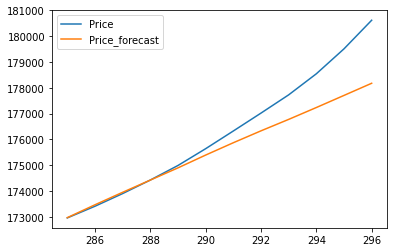

In [77]:
comp.plot()

## 4. Crossfold Validation Testing

### Results were good on the original train/test test but that only evaluates the prediction performance on the last 12 months of the dataset which was relatively straightforward and linear



#### the next step will assess the performance over multiple time periods including the '08' housing market dip 

In [78]:
def tscv(df, cv,test_size, min_samples = 60):
    
    
    #training size should not go below 60 records
    #divide training size by crossfolds desired
    #if less than 60 use 60, otherwise use teh amount
    train_size = round(len(df)/cv)
    if train_size > min_samples:
        train_size = round(len(df)/cv)
    else:
        train_size = 60
    
    
    
    #establish the first position to start
    
    first_train = len(df) - (train_size + ((test_size * (cv-1))) + test_size)
    
    train = []
    test = []
    
    #create the train/test splits
    
    n = 0
    
    for i in range(0,cv+ 1):

        if i == 0:
            train.append(df[0:first_train])
            test.append(df[first_train: (first_train + test_size)])
        else:
            train.append(df[first_train:(first_train+train_size)])
            test.append(df[(first_train + train_size): (first_train + train_size + test_size)])

            first_train = first_train + test_size

    return train, test
   
    


In [79]:
#function to visually see the train/test splits

def splits(train, test):

    tstart = []
    tend = []
    test_start = []
    test_end = []
    for n in range(0, len(train)):

        tstart.append(train[n][0:1].index.to_numpy())
        tend.append(train[n][-1:].index.to_numpy())
        test_start.append(test[n][0:1].index.to_numpy())
        test_end.append(test[n][-1:].index.to_numpy())
    
    return pd.DataFrame({'train_from':tstart, 'train_to':tend, 'test_from':test_start, 'test_to': test_end}, index = range(0,len(train)))

In [80]:
#run the split. Validate the sets
train, test = tscv(df2, 10, 12) 
splits(train,test)

,train_from,train_to,test_from,test_to
0,[0],[116],[117],[128]
1,[117],[176],[177],[188]
2,[129],[188],[189],[200]
3,[141],[200],[201],[212]
4,[153],[212],[213],[224]
5,[165],[224],[225],[236]
6,[177],[236],[237],[248]
7,[189],[248],[249],[260]
8,[201],[260],[261],[272]
9,[213],[272],[273],[284]


In [81]:
#function for cross validation
def var_forecast_cv(df_train, df_test, nobs, diff = 2):
    
    df_differenced = df_train.diff().diff().dropna()
    
    
    model = VAR(df_differenced)
    results = model.fit(maxlags=8, ic='aic')
    
    pred = results.forecast(results.y, steps=nobs)
    df_forecast = pd.DataFrame(pred, df_test.index, columns=df_train.columns + '_1d')
    df_results = invert_transformation(df_train, df_forecast, second_diff=True)   
    return df_results, df_test

In [82]:
#run the cross validation
lst_accuracy = []
for n in range(0, len(train)):

    df_for, df_act = var_forecast_cv(train[n], test[n], 12, 2)
    accuracy = pd.concat([df_act['Price'],df_for['Price_forecast']], axis = 1)
    
    lst_accuracy.append(accuracy)

0.9929888707336801
1347.9334129135746


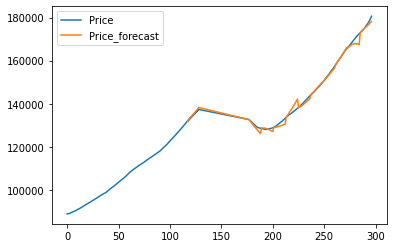

In [83]:
fullbacktest =pd.concat(lst_accuracy)
print(r2_score(fullbacktest.Price, fullbacktest.Price_forecast))
print(np.sqrt(mean_squared_error(fullbacktest.Price, fullbacktest.Price_forecast)))

pd.concat([df[['Price']][:128],fullbacktest]).plot()

### -  As you can see above the 10 Cross Fold Validation yielded impressive results on cluster three. This was to be expected given that our preliminary analysis on that kmeans group indicated stable prices, low volatility, and little variation to growth rates, even during 2008's housing crisis and economic downturn

### - I'll run the same routine below on clusters 0, 1, and 2. Results are markedly worse on these clusters - particulary cluster 2 - given their higher volatility and standard deviation of prices

In [84]:
## quick function to re-use the cross validation code on the other three clusters
## again my hypothesis is they will perform worse given their volative nature respective to cluster 3's stable prices
def cv_cluster(cluster):
    d = HomeValues[HomeValues.labels == cluster].groupby('Date')['Price'].mean().reset_index()
    d.columns = ['DATE', 'Price']
    d.DATE = pd.to_datetime(d.DATE)
    d = d.merge(dfMacro, on = 'DATE', how = 'left')

    dx = d.drop(columns = drop)
    train, test = tscv(dx, 10, 12) 

    #run the cross validation
    lst_accuracy = []
    for n in range(0, len(train)):

        df_for, df_act = var_forecast_cv(train[n], test[n], 12, 2)
        accuracy = pd.concat([df_act['Price'],df_for['Price_forecast']], axis = 1)

        lst_accuracy.append(accuracy)

    fullbacktest =pd.concat(lst_accuracy)
    print('R2:', r2_score(fullbacktest.Price, fullbacktest.Price_forecast))
    print('RMSE:', np.sqrt(mean_squared_error(fullbacktest.Price, fullbacktest.Price_forecast)))
    
    R2 = r2_score(fullbacktest.Price, fullbacktest.Price_forecast)
    RMSE = np.sqrt(mean_squared_error(fullbacktest.Price, fullbacktest.Price_forecast))


   

    pd.concat([d[['Price']][:128],fullbacktest]).plot()
    return R2, RMSE 


R2: 0.9929888707336801
RMSE: 1347.9334129135746


(0.9929888707336801, 1347.9334129135746)

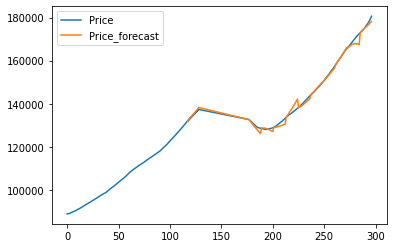

In [85]:
cv_cluster(3)

R2: 0.9614389350527585
RMSE: 5341.656301499411


(0.9614389350527585, 5341.656301499411)

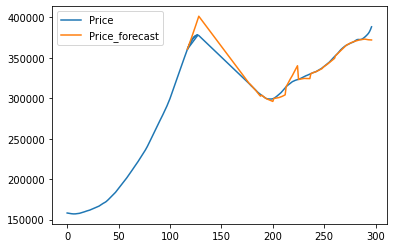

In [86]:
cv_cluster(0)

R2: 0.9226200230433111
RMSE: 16387.87299723333


(0.9226200230433111, 16387.87299723333)

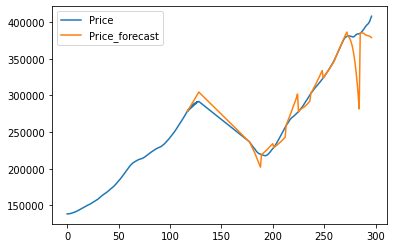

In [87]:
cv_cluster(1)

R2: 0.964197749501559
RMSE: 13922.585870439654


(0.964197749501559, 13922.585870439654)

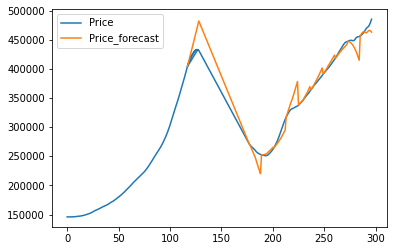

In [88]:
cv_cluster(2)

## 5 Final Modeling and Predictions

### Time to Run model through each city/state combo to get predictions by city/state

Write the necessary functions

In [89]:
# forecasting

def var(df, nobs, rt = 'last'):
    
    #drop city/state column and dates
    df_train = df.drop(columns = 'CityState').sort_values(by = 'DATE')
    df_train.drop(columns = 'DATE', inplace = True)

    #difference the series
    df_differenced = df_train.diff().diff().dropna()
    
    #fit the model
    model = VAR(df_differenced)
    results = model.fit(maxlags=8, ic='aic')
    
    #run prediction. Store results
    pred = results.forecast(results.y, steps=nobs)
    df_forecast = pd.DataFrame(pred, index=df_train.index[-nobs:], columns=df_train.columns + '_1d')
    
    #run function to invert results back to non differenced
    df_results = invert_transformation(df_train, df_forecast, second_diff=True)
    
    
    
    #if rt param = last then return last forecasted value in series. Else return the whole series
    if rt == 'last':
        return df_results.Price_forecast.values[-1]
    else:
        return df_results.Price_forecast.values

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Function to calculate principle and interest on mortgage
def mortgage(row, Down,Type,Rate,rt):
    
    Price = row['Price']
    Sales_Price = float(Price)
    Down_Payment =  float(Down)
    Loan_Amount = Sales_Price - Down_Payment
    Mortgage_Type =  float(Type)
    Loan_Term = int(12*Mortgage_Type)
    Interest_Rate =  float(Rate)
    R = 1 +(Interest_Rate)/(12*100)
    X = Loan_Amount*(R**Loan_Term)*(1-R)/(1-R**Loan_Term)
    Monthly_Interest = []
    Monthly_Balance  = []
    Monthly_P = []
    for i in range(1,Loan_Term+1):
        Interest = Loan_Amount*(R-1)
        P = X - Interest
        Loan_Amount = Loan_Amount - (X-Interest)
        Monthly_Interest = np.append(Monthly_Interest,Interest)
        Monthly_P = np.append(Monthly_P,P)
        Monthly_Balance = np.append(Monthly_Balance, Loan_Amount)
        
    schedule = pd.DataFrame({'P': Monthly_P, 'I':Monthly_Interest, 'Remaining':Monthly_Balance})[0:12]
    schedule['Payment'] = schedule.P + schedule.I
    
    if rt == 'I':
        return schedule[0:12].I.sum()
    if rt =='P':
        return schedule[0:12].P.sum()

In [99]:
dfRental = pd.read_csv('Zillow Rental by Zip.csv')[['RegionName','2020-09']]
dfRental.columns = ['ZipCode', 'Rent']
dfMerged = HomeValues.merge(dfRental, on = 'ZipCode').dropna()
dfMerged['CityState'] = dfMerged.City + '-' + dfMerged.State

drop =  ['GDP', 'UMCSENT','HOUST','SP_Value','SP500 Growth', 'PE_Ratio']

In [100]:
def PriceForecast(dfMerged, cluster, pricedate, drop):
#Merge Available Rent with Homevalues


    #filter to cluster 2, summarize by cluster 2 average values, merge with Macro Eco Data
    MetroGroup = dfMerged[dfMerged.labels == cluster].groupby(['Date','CityState'])['Price'].mean().reset_index()
    MetroGroup.columns = ['DATE','CityState', 'Price']
    MetroGroup.DATE = pd.to_datetime(MetroGroup.DATE)
    df = MetroGroup.merge(dfMacro, on = 'DATE')
    df = df.drop(columns = drop)

    #Get City/State Combos in my price range
    dfFiltered = df[df.DATE == pricedate]
    dfFiltered = dfFiltered[(dfFiltered.Price > 200000) & (dfFiltered.Price < 350000)]


    #forecast pricing model for each city/state
    
    #get list of city/states to loop through
    metro_list = dfFiltered.CityState.value_counts().index

    
    #create empy lists to store values
    lstfcst = []
    lst_r2 = []
    lst_rmse = []
    
    for n in metro_list:
        
        dfcity = df[df.CityState == n]
        fcst = var(dfcity,12)
        lstfcst.append(fcst)
        
        #run forecasts for accuracy tests
        #run train, test function and cross validation for each city/state combo to get a margin of error
        #cross val-----------------------------------------------------------------------------------------
        train, test = tscv(dfcity, 10, 12) 
        lst_accuracy = []
        for n in range(0,len(train)):
            
            train[n].drop(columns = ['DATE','CityState'], inplace = True)
            
            df_for, df_act = var_forecast_cv(train[n],test[n], 12, 2)
            accuracy = pd.concat([df_act['Price'],df_for['Price_forecast']], axis = 1)
            lst_accuracy.append(accuracy)
        
        #calculate metrics
        fullbacktest =pd.concat(lst_accuracy)
        r2 = r2_score(fullbacktest.Price, fullbacktest.Price_forecast)
        rmse = np.sqrt(mean_squared_error(fullbacktest.Price, fullbacktest.Price_forecast))
        lst_r2.append(r2)
        lst_rmse.append(rmse)
        #cross val end --------------------------------------------------------------------------------------
        

        
    
    MetroForecasts = pd.DataFrame({'CityState':metro_list, 'Price_f': lstfcst, 'r2': lst_r2, 'rmse': lst_rmse})
    ForecastbyCity = dfFiltered.merge(MetroForecasts, on = 'CityState')
    ForecastbyCity['PriceInc'] = (ForecastbyCity.Price_f - ForecastbyCity.Price)/ForecastbyCity.Price
    ForecastbyCity = ForecastbyCity[['CityState','Price','Price_f','PriceInc','r2', 'rmse']].sort_values(by = 'PriceInc')
    dfRentSum = dfMerged[dfMerged.Date =='2020-09-30'].groupby('CityState')['Rent'].mean().reset_index()

    ReturnSum = ForecastbyCity.merge(dfRentSum, on = 'CityState')
    ReturnSum['RentalReturn'] = ReturnSum.Rent/ReturnSum.Price
    ReturnSum['TotalReturn'] = ReturnSum.RentalReturn + ReturnSum.PriceInc

    ReturnSum['Interest'] = ReturnSum.apply(mortgage, axis = 1, Down = 60000, Type = 30, Rate = 3, rt = 'I')
    ReturnSum['Princple'] = ReturnSum.apply(mortgage, axis = 1, Down = 60000, Type = 30, Rate = 3, rt = 'P')
    ReturnSum['MonthlyCash'] = ReturnSum.Rent  - (ReturnSum.Princple + ReturnSum.Interest)/12
    ReturnSum['NetRentReturn'] = (ReturnSum.Rent * 12) - ReturnSum.Interest
    ReturnSum['TotalReturn'] = (ReturnSum.Price_f - ReturnSum.Price) + ReturnSum.NetRentReturn
    ReturnSum['TotalReturn_Per'] = ReturnSum.TotalReturn/ReturnSum.Price
    ReturnSum['Cluster'] = cluster
    ReturnSum['MOE'] = ReturnSum.rmse/ReturnSum.Price
    
    
    
    return ReturnSum

In [101]:
def graph_price(df, citystate):
    Actuals = df[df.CityState == citystate][['DATE','Price']].set_index('DATE')
    Actuals['Type'] = 'Actual'
    Forecast = var(df[df.CityState == citystate], 12, rt = 'all')
    lastdate = Actuals.index[-1]
    dtarray = []
    for i in range(1,len(Forecast)+1):
        dtarray.append(pd.to_datetime(lastdate) + MonthEnd(i))
        
    dfForecast = pd.DataFrame({'Price':Forecast,'Type':'Forecast'}, index = dtarray)
    Prices = pd.concat([Actuals,dfForecast])
    Prices['CityState'] = citystate
    Prices['pct_change'] = Prices.Price.pct_change()
    #sns.lineplot(data = Prices, x = Prices.index, y = 'Price', hue= 'Type')
    return Prices

In [111]:
def Forecast_All(dfMerged, pricedate, drop):
#Merge Available Rent with Homevalues


    #filter to cluster 2, summarize by cluster 2 average values, merge with Macro Eco Data
    MetroGroup = dfMerged.groupby(['Date','CityState'])['Price'].mean().reset_index()
    MetroGroup.columns = ['DATE','CityState', 'Price']
    MetroGroup.DATE = pd.to_datetime(MetroGroup.DATE)
    df = MetroGroup.merge(dfMacro, on = 'DATE')
    df = df.drop(columns = drop)

    #Get City/State Combos in my price range
    dfFiltered = df[df.DATE == pricedate]
    dfFiltered = dfFiltered[(dfFiltered.Price > 200000) & (dfFiltered.Price < 350000)]


    #forecast pricing model for each city/state
    
    #get list of city/states to loop through
    metro_list = dfFiltered.CityState.value_counts().index

    
    #create empy lists to store values
    lstfcst = []
    lstact = []
    lst_accuracy = []
    for st in metro_list:
        
        full = graph_price(df,st)
        lstact.append(full)
        
        
        #run forecasts for accuracy tests
        #run train, test function and cross validation for each city/state combo to get a margin of error
        #cross val-----------------------------------------------------------------------------------------
        dfcity = df[df.CityState == st]
        train, test = tscv(dfcity, 10, 12) 
        
        for n in range(0,len(train)):
            
            train[n].drop(columns = ['DATE','CityState'], inplace = True)
            
            df_for, df_act = var_forecast_cv(train[n],test[n], 12, 2)
            accuracy = pd.concat([df_act['DATE'],df_for['Price_forecast']], axis = 1)
            accuracy['Type'] = 'Forecast'
            accuracy['CityState'] = st
            accuracy['pct_chg'] = accuracy.Price_forecast.pct_change()
            accuracy.pct_change
            lst_accuracy.append(accuracy)
    
        
            
    return pd.concat(lstact), pd.concat(lst_accuracy) #pd.DataFrame(lstfcst, index = metro_list)
    

In [114]:
#create forecasts for each cluster

c0 = PriceForecast(dfMerged,0, '2020-09-30', drop).sort_values(by = 'TotalReturn_Per', ascending = False)
c1 = PriceForecast(dfMerged, 1, '2020-09-30', drop).sort_values(by = 'TotalReturn_Per', ascending = False)
c2 = PriceForecast(dfMerged, 2, '2020-09-30', drop).sort_values(by = 'TotalReturn_Per', ascending = False)
c3 = PriceForecast(dfMerged, 3, '2020-09-30', drop).sort_values(by = 'TotalReturn_Per', ascending = False)



series = Forecast_All(dfMerged, '2020-09-30', drop)

In [115]:
series0 = series[0].reset_index()
series0.columns = ['DATE','Price', 'Type', 'CityState', 'pct_change']
series1 = series[1]
series1.columns = ['DATE','Price', 'Type', 'CityState', 'pct_change']
series = pd.concat([series0,series1])

In [116]:
series1.CityState.value_counts()

Johnston-RI             132
North Lauderdale-FL     132
Williamsburg-VA         132
Snellville-GA           132
San Antonio-TX          132
                       ... 
Dover-NH                132
Bixby-OK                132
Altamonte Springs-FL    132
Orange Park-FL          132
Canton-MI               132
Name: CityState, Length: 480, dtype: int64

### Top 10 By Total Return

In [117]:
c3.sort_values(by = 'TotalReturn_Per', ascending = False).head(10)

,CityState,Price,Price_f,PriceInc,r2,rmse,Rent,RentalReturn,TotalReturn,Interest,Princple,MonthlyCash,NetRentReturn,TotalReturn_Per,Cluster,MOE
127,Rock Hill-SC,232258.0,283907.686913,0.222381,0.932658,7109.017474,1222.000000,0.005261,61195.129938,5118.556976,3596.403141,495.753324,9545.443024,0.263479,3,0.030608
123,Clayton-NC,225193.0,248148.921747,0.101939,0.942520,5485.708914,1472.000000,0.006537,35711.297576,4908.624171,3448.900046,775.539649,12755.375829,0.158581,3,0.024360
125,Security-Widefield-CO,273654.0,303185.419340,0.107915,0.988182,3940.705529,1606.000000,0.005869,42454.801732,6348.617609,4460.668978,705.226118,12923.382391,0.155140,3,0.014400
120,Pineville-NC,246777.0,270191.842363,0.094883,0.960512,6144.889395,1692.000000,0.006856,38168.860846,5549.981517,3899.530875,904.540634,14754.018483,0.154669,3,0.024901
126,Fountain-CO,302301.0,336674.882732,0.113707,0.989899,3694.131230,1598.000000,0.005286,46350.034401,7199.848331,5058.761147,576.449210,11976.151669,0.153324,3,0.012220
122,Matthews-NC,307769.0,338855.600211,0.101006,0.962597,7249.604150,1607.000000,0.005221,43008.273101,7362.327110,5172.922070,562.395902,11921.672890,0.139742,3,0.023555
124,Charlotte-NC,327879.0,362541.757056,0.105718,0.973304,6494.030077,1495.347826,0.004561,44647.045657,7959.885312,5592.778722,365.959157,9984.288601,0.136169,3,0.019806
121,Rochester-NY,219608.0,241501.864851,0.099695,0.855150,8924.837835,1043.000000,0.004749,29667.196053,4742.668798,3332.296396,370.086234,7773.331202,0.135092,3,0.040640
105,Bartlett-TN,205545.0,219966.809042,0.070164,0.961575,3904.596878,1420.000000,0.006908,27137.014983,4324.794059,3038.689032,806.376409,12715.205941,0.132025,3,0.018996
111,Concord-NC,249293.5,269973.268558,0.082954,0.908440,8628.860641,1450.500000,0.005818,32461.010551,5624.758008,3952.070372,652.430968,11781.241992,0.130212,3,0.034613


### Top 10 By Monthly Cash Flow

In [118]:
c3.sort_values(by = 'MonthlyCash', ascending = False).head(10)

,CityState,Price,Price_f,PriceInc,r2,rmse,Rent,RentalReturn,TotalReturn,Interest,Princple,MonthlyCash,NetRentReturn,TotalReturn_Per,Cluster,MOE
46,Cedar Hill-TX,230232.000000,237307.355207,0.030731,0.992060,3115.416685,1702.000000,0.007393,22440.999768,5058.355438,3554.104306,984.295021,15365.644562,0.097471,3,0.013532
35,Watauga-TX,200898.000000,205880.562288,0.024801,0.997868,1566.097978,1550.000000,0.007715,19395.851420,4186.710868,2941.668949,955.968349,14413.289132,0.096546,3,0.007795
19,Richland Hills-TX,237611.000000,241311.063651,0.015572,0.990015,3844.412976,1703.000000,0.007167,18858.445061,5277.618590,3708.163095,954.184860,15158.381410,0.079367,3,0.016179
87,Crosby-TX,204578.000000,215873.031538,0.055211,0.984156,3138.673055,1526.000000,0.007459,25310.971382,4296.060156,3018.500002,916.453320,14015.939844,0.123723,3,0.015342
120,Pineville-NC,246777.000000,270191.842363,0.094883,0.960512,6144.889395,1692.000000,0.006856,38168.860846,5549.981517,3899.530875,904.540634,14754.018483,0.154669,3,0.024901
73,Royse City-TX,261612.000000,273267.208841,0.044552,0.987001,4261.450794,1752.000000,0.006697,26688.413006,5990.795835,4209.256059,901.995676,15033.204165,0.102015,3,0.016289
48,Atascocita-TX,213721.500000,221097.959762,0.034514,0.976184,3788.162019,1545.000000,0.007229,21348.705253,4567.754509,3209.398028,896.903955,13972.245491,0.099890,3,0.017725
36,Crowley-TX,229386.000000,235197.915724,0.025337,0.990941,3037.814398,1602.000000,0.006984,20002.698736,5033.216988,3536.441515,887.861791,14190.783012,0.087201,3,0.013243
10,Garland-TX,226599.666667,227203.522924,0.002665,0.988738,3903.779814,1573.000000,0.006942,14529.433717,4950.422540,3478.268438,870.609085,13925.577460,0.064119,3,0.017228
56,Arlington-TX,226630.250000,235304.209124,0.038274,0.997073,1852.914265,1567.555556,0.006917,22533.294482,4951.331308,3478.906957,865.035700,13859.335358,0.099428,3,0.008176


### Top 10 by Accuracy

In [119]:
c3.sort_values(by = 'MOE', ascending = True).head(10)

,CityState,Price,Price_f,PriceInc,r2,rmse,Rent,RentalReturn,TotalReturn,Interest,Princple,MonthlyCash,NetRentReturn,TotalReturn_Per,Cluster,MOE
35,Watauga-TX,200898.000000,205880.562288,0.024801,0.997868,1566.097978,1550.000000,0.007715,19395.851420,4186.710868,2941.668949,955.968349,14413.289132,0.096546,3,0.007795
56,Arlington-TX,226630.250000,235304.209124,0.038274,0.997073,1852.914265,1567.555556,0.006917,22533.294482,4951.331308,3478.906957,865.035700,13859.335358,0.099428,3,0.008176
11,Ballwin-MO,299309.500000,300121.201428,0.002712,0.988284,2740.673764,1614.000000,0.005392,13068.743965,7110.957462,4996.304599,605.061495,12257.042538,0.043663,3,0.009157
99,Mason-OH,327737.000000,347863.890043,0.061412,0.986983,3163.027390,1737.000000,0.005300,33015.224187,7955.665856,5589.814046,608.210008,12888.334144,0.100737,3,0.009651
23,Benbrook-TX,264561.000000,269158.018872,0.017376,0.994933,2568.155131,1593.000000,0.006021,17634.595034,6078.423838,4270.825291,730.562573,13037.576162,0.066656,3,0.009707
15,Fort Worth-TX,255373.466667,258708.229221,0.013058,0.995134,2594.999661,1545.888889,0.006053,16080.008163,5805.421058,4079.007937,722.186473,12745.245608,0.062967,3,0.010162
0,Schertz-TX,244331.000000,229296.247695,-0.061534,0.987926,2570.570359,1579.000000,0.006463,-1564.052203,5477.299898,3848.463279,801.853069,13470.700102,-0.006401,3,0.010521
49,Grand Prairie-TX,241276.000000,249722.068580,0.035006,0.995608,2581.717450,1495.000000,0.006196,20999.546419,5386.522160,3784.680978,730.733072,12553.477840,0.087035,3,0.010700
27,Wylie-TX,305797.000000,312066.516538,0.020502,0.995318,3338.219964,1624.000000,0.005311,18453.786383,7303.730154,5131.750647,587.709933,12184.269846,0.060347,3,0.010916
66,Edmond-OK,248971.250000,259382.844075,0.041818,0.965835,2772.883911,1306.750000,0.005249,20477.411559,5615.182516,3945.342435,510.039587,10065.817484,0.082248,3,0.011137


In [120]:
#export for tableau

full = pd.concat([c0, c2, c3, c1])
full = full[full.CityState.duplicated() == False]
full.shape
#series = series[series.CityState.duplicated() == False]


(494, 16)

In [121]:
series = series[series[['DATE','CityState','Type']].duplicated() == False]

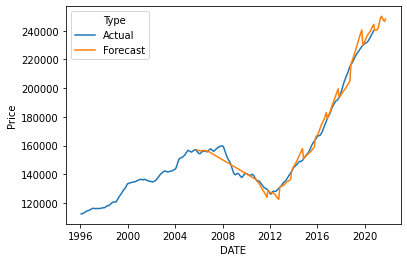

In [122]:
sns.lineplot(data = series[series.CityState == 'Desoto-TX'], x = 'DATE', y = 'Price', hue = 'Type')

In [123]:
full.to_csv('HomeForecasts.csv')
series.to_csv('HomeForecast_Series.csv')